## Arquetipo del consumidor potencial

### Estudio sobre consumo de sustancias psicodélicas

- Muestra: 1021 personas
- Periodo: Enero-marzo 2024
- Residencia: Europa (63%), América del sur (30%), América del norte (5%), África (2%), Asia (1,9%), Oceanía (0,09%)
- Rango edad: 18-79
- Rango ingresos: 5000$-100000$
- Sexo: 52% hombres, 48%- mujeres
- Entorno: urbano (79%) y residencial (21%)
- Nivel educativo: Grado universitario(68%), Educ. Primaria (30%), Postgrado (0.6%)
- Consumidores de psicodélicos: Sí (73%), No (27%)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr

pd.set_option('display.max_columns', None)

In [2]:
from utils.lista_funciones import tricategorical_analysis, \
    plot_categorical_numerical_relationship, \
    plot_combined_graphs, \
    pinta_distribucion_categoricas, \
    plot_grouped_boxplots, \
    plot_categorical_relationship_fin, \
    plot_grouped_histograms, \
    grafico_dispersion_con_correlacion, \
    bubble_plot, \
    cardinalidad

**Se carga el CSV procedente de la Parte 1 del ejercicio**

In [3]:
df = pd.read_csv('data/1000sujetos_editado.csv')

## Parte 1/2: Limpiamos Dataset

Para esta parte del ejercicio, nos quedamos solo con las personas que sí declaran consumir sustancias psicodélicas

In [4]:
df = df[df['ha_consumido'] == 'Sí']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   edad                         742 non-null    int64 
 1   sexo                         742 non-null    object
 2   estatus                      742 non-null    object
 3   residencia                   742 non-null    object
 4   entorno_res                  742 non-null    object
 5   empleo                       742 non-null    object
 6   nivel_edu                    742 non-null    object
 7   ingresos                     742 non-null    object
 8   ha_consumido                 742 non-null    object
 9   sustancias_consumidas        742 non-null    object
 10  consumo_estimado             742 non-null    object
 11  ultimo_consumo               742 non-null    object
 12  t_1-ultimo_cons              742 non-null    object
 13  frec_anual                   742 no

In [6]:
df.head(3)

,edad,sexo,estatus,residencia,entorno_res,empleo,nivel_edu,ingresos,ha_consumido,sustancias_consumidas,consumo_estimado,ultimo_consumo,t_1-ultimo_cons,frec_anual,frec_anual_efect.intenso,ha_microdosificado,sust_micro,sust_combi,ultima_sust_combinadas,efect_advers_bajo.efectos,efect_advers_despues,dieta_para_consumo,con_quien_consume,motivacion,donde_consume,experien_significat,veces_exper_signific,diagnost_alguna_vez,diagnost_actual,trastornos_diagnost,momento_diagnost,medicado_pasado,medicado_presente,consume_para_tratar,intencion_consumo_tratar,abierto_terap_psicodel,dieta_general,frec_deporte,frec_meditacion,sustancias_consumidas_princ,motivacion_princ,donde_consume_princ,con_quien_consume_princ
0,25,Hombre,Soltero/a,Europa,Urbano,Estudiante,Educación universitaria,"10,000-20,000",Sí,"LSD (ácido, tripi), Psilocibina (setas o trufa...",30,Hace menos de 1 mes,Más de 5 años,Una vez al mes o menos,Varias veces al año,No,Ninguna,"Cafeína, Cannabis, Alcohol","Cafeína, Cannabis, Alcohol","Ansiedad, Mareo, Náuseas, Vómito, Dolor de est...",Ninguno,Ninguna,"Amigos, Pareja","Para divertirme, Para conocerme mejor, Con fin...","En casa, En la naturaleza, En la calle, En fie...",Extremadamente,Muy pocas veces,No,No,Ninguno,Nunca me han diagnosticado,No,No,No,Sí,Sí,Omnívora,Más,Esporádicamente,LSD,Diversión,Casa,Amigos
1,30,Hombre,Soltero/a,Europa,Urbano,Jornada completa,Educación universitaria,"10,000-20,000",Sí,"Psilocibina (setas o trufas mágicas), MDMA (éx...",5,Hace más de 1 año,Más de 5 años,Menos de una vez al año,Menos de una vez al año,No,Ninguna,"Cannabis, Alcohol","Cannabis, Alcohol",Ansiedad,"Depresión, Ansiedad, Vómito",Ninguna,Amigos,"Para divertirme, Para escapar de mis problemas","En casa, En la naturaleza",Un poco,Ninguna vez,No,No,Ninguno,Nunca me han diagnosticado,No,No,No,No,Tal vez,Omnívora,Esporádicamente,Nunca,Psilocibina,Diversión,Casa,Amigos
2,24,Hombre,Soltero/a,Europa,Urbano,Estudiante,Educación universitaria,No sabe/No contesta,Sí,"LSD (ácido, tripi), Mescalina (peyote, San Ped...",20,Hace menos de 6 meses,Más de 1 año,Una vez al año,Una vez al año,Sí,"LSD (ácido, tripi), Mescalina (peyote, San Ped...","Cafeína, Cannabis, Alcohol, Ansiolíticos","Ninguna, No he consumido sustancias psicodélicas","Paranoia o psicosis, Ansiedad, Pánico, Taquica...",Ansiedad,Abstinencia de otras drogas,Solo,"Para divertirme, Para conocerme mejor, Con fin...","En casa, En la naturaleza",Extremadamente,Algunas veces,Sí,Sí,"Depresión, Trastorno de ansiedad generalizada,...",Después,Sí,No,Sí,Tal vez,Tal vez,Omnívora,Cinco veces por semana,Cuatro veces por semana,LSD,Diversión,Casa,Solo


### 1.1 Columna 'ingresos'

Los ingresos están indicados como rangos, pero nos interesa tenerlo en números para operar operar como variable numérica.

In [7]:
#Convertimos todas los rangos de ingresos en su media
df.loc[df['ingresos'] == '0-10,000', 'ingresos'] = 5000
df.loc[df['ingresos'] == '10,000-20,000', 'ingresos'] = 15000
df.loc[df['ingresos'] == '20,000-30,000', 'ingresos'] = 25000
df.loc[df['ingresos'] == '30,000-40,000', 'ingresos'] = 35000
df.loc[df['ingresos'] == '40,000-50,000', 'ingresos'] = 45000
df.loc[df['ingresos'] == '50,000-60,000', 'ingresos'] = 55000
df.loc[df['ingresos'] == '60,000-70,000', 'ingresos'] = 65000
df.loc[df['ingresos'] == '70,000-80,000', 'ingresos'] = 75000
df.loc[df['ingresos'] == '80,000-90,000', 'ingresos'] = 85000
df.loc[df['ingresos'] == '90,000-100,000', 'ingresos'] = 95000
df.loc[df['ingresos'] == '100,000 ó más', 'ingresos'] = 100000

#Pasamos los strings a números, salvo los 'No sabe/No contesta'
df['ingresos'] = pd.to_numeric(df['ingresos'], errors='coerce')

#Pasar los NaN a la mediana de los valores la columna
mediana = df['ingresos'].median()
df['ingresos'] = df['ingresos'].fillna(mediana)

#Pasamos la columna 'ingresos' a tipo numérica
df['ingresos'] = df['ingresos'].astype('int64')

#Value counts
df['ingresos'].value_counts()

ingresos
15000     346
5000      146
25000     109
35000      55
45000      28
55000      17
100000     14
65000       9
75000       8
95000       7
85000       3
Name: count, dtype: int64

### 1.2 Columna 'consumo_estimado'
Convertimos la columna 'consumo_estimado' de tipo 'object' a numérica

In [8]:
#Convertimos la columna 'consumo_estimado' a numérica
df['consumo_estimado'].unique()
df['consumo_estimado'] = df['consumo_estimado'].apply(lambda x: '100' if str(x).startswith('Más') else x)
df['consumo_estimado'] = df['consumo_estimado'].astype('int64')

### 1.3 Columna 'estatus'
La columna 'estatus' tiene <u>15 valores únicos</u>

In [9]:
df.estatus.nunique()

15

Agrupamos por unas pocas categorías

In [10]:
#Reducimos la columna 'estatus' a unas pocas categorías
soltero = ['Soltero/a',
           'No tengo carga']

pareja = ['En pareja',
             'Casado/a',
             'En pareja con hijos anteriores ',
             'Relación no conviviente',
             'Casade pero en relaciones poliamorosas',
             'Pareja no conviviente',
             'Poliamor']

separado_divorciado = ['Divorciado/a',
                       'Separado',
                       'Distanciado',
                       'Separada',
                       'Separada sin casarse con hijo',
                       'Madre monoparental']

viudo = ['Viudo/a']

df['estatus'] = df['estatus'].replace(soltero, 'Soltero/a')
df['estatus'] = df['estatus'].replace(pareja, 'En pareja')
df['estatus'] = df['estatus'].replace(separado_divorciado, 'Separado/a o divorciado/a')
df['estatus'] = df['estatus'].replace(viudo, 'Viudo/a')

#Value counts
df.estatus.value_counts()

estatus
En pareja                    337
Soltero/a                    323
Separado/a o divorciado/a     75
Viudo/a                        7
Name: count, dtype: int64

### 1.4 Columna 'empleo'
La columna 'empleo' tiene <u>59 valores únicos</u>

In [11]:
df['empleo'].nunique()

59

Agrupamos por unas pocas categorías

In [12]:
cuenta_ajena = ['Jornada completa',
                'Media jornada/tiempo parcial',
                'Jornada intensiva',
                'Media jornada + estudiante',
                'Media jornada',
                'Ventas',
                'Jornada completa/estudiante',
                'Estudio y trabajo',
                'Jornada completa/estudiante ',
                'Madre, Media jornada, estudiante, amo de casa ',
                'Media jornada + estudiante ',
                'Estudio y trabajo ']

autonomo = ['Autónomo ',
            'Personal',
            'Emprendedora',
            'Autónomo',
            'Autonomo',
            'pequeña empresa',
            'Independiente',
            'Danzaterapeuta',
            'autonomo',
            'Terapeuta ',
            'Artista Lírico Solista ',
            'Autónomo, sin horarios fijos',
            'Autónoma',
            'Trabajo por mi cuenta ',
            'Emprendedor',
            'free lance ',
            'Trabajo x mi cuenta, horario variado',
            'Freelance ',
            'Artista',
            'Comerciante ',
            'Autonoma, ',
            'Independiente',
            'Dr. Antropólogo',
            'Músico de handpan',
            'Por honorarios ',
            'Trabajos temporales ',
            'Conductor por destajo',
            'Empresa propia ',
            'Libre ejercicio de la profesión ',
            'Comerciante',
            'Turno 24x48',
            '3 trabajos por prestacion de servicios',
            'Empresario',
            'Terapeuta manejo mi propio horario',
            'Terciaria ',
            'Flexible independiente ',
            'Trabajo independiente ',
            'Facilitador de Ayahuasca',
            'Autonoma',
            'Teletrabajo, organizo mi tiempo.',
            'Freelance',
            'Temporero',
            'Temporada verano',
            'Temporera',
            'artista plástica',
            'pequeña empresa (te faltan varias opciones de empleos)',
            'Independiente ',
            'Arte',
            'Rentista']

estudiante = ['Estudiante',
              'Prácticas de máster',
              'estudiante']

pensionista = ['PENSIONISTA',
               'Pensionista',
               'pensionista',
               'Jubilado']

otros = ['Amo/a de casa',
            'amo de casa',
            'No sabe/No contesta']


df['empleo'] = df['empleo'].replace(cuenta_ajena, 'Empleado')
df['empleo'] = df['empleo'].replace(otros, 'Otros')
df['empleo'] = df['empleo'].replace(autonomo, 'Autonomo')
df['empleo'] = df['empleo'].replace(estudiante, 'Estudiante')
df['empleo'] = df['empleo'].replace(pensionista, 'Pensionista')

df.empleo.value_counts()

empleo
Empleado       476
Estudiante      77
Desempleado     58
Autonomo        58
Otros           40
Pensionista     33
Name: count, dtype: int64

### 1.5 Columna 'nivel_edu'
La columna 'nivel_edu' tiene <u>49 valores únicos</u>

In [13]:
df['nivel_edu'].nunique()

49

Agrupamos por unas pocas categorías

In [14]:
#Reducimos la columna 'nivel_edu civil' a unas pocas categorías

edu_sup = ['Educación universitaria',
           'terciaria: Magisterio (también te faltan opciones en ese ítem)',
           'Licenciado ',
           'Terciaria',
           'Terciario ',
           'Estudios de postgrado en pedagogía ',
           'Estudios Artísticos ',
           'Grado Superior ',
           'Post grado',
           'maestría',
           'Pos Grando',
           'Master,edicación universitaria',
           'Doctor',
           'posgrado'
           'Master, edicación universitaria',
           'Master, edicación universitaria',
           'posgrado',
           'postgrado',
           'Maestría']

edu_sec = ['Grado medio ',
            'Ciclo formativo de grado superior ',
            'Ciclo Formativo de grado superior ',
            'FP',
            'Ciclo Formativo Grado Superior',
            'Preparatoria',
            'Grado superior',
            'Formación Profesional ',
            'Ciclo superior',
            'FP2','estudiando en la universidad ',
            'Técnico superior ',
            'Comercio',
            'estudiando tecnicatura ',
            'Profesional',
            'Técnico ',
            'Certificados de profesionalidad ',
            'Formación Profesional GS',
            'FP superior',
            'Grado superior ',
            'Formación Profesional Superior',
            'Psicoterapeuta ',
            'Formación profesional ',
            'Técnico superior F.P.',
            'Diseño de interiores',
            'Medio',
            'FpII',
            'Grado Superior',
            'Bachiller',
            'Fp',
            'Formación profesional superior',
            'Educación secundaria',
            'Medio superior Bachillerato ',
            'Bachillerato ',
            'Formación Profesional de Grado Superior',
            'Universidad incompleta ',
            'Bachiller Superior ',
            'EBAU ']

otros = ['No sabe/No contesta',
         'Ninguno']



df['nivel_edu'] = df['nivel_edu'].replace(edu_sup, 'Educación superior')
df['nivel_edu'] = df['nivel_edu'].replace(edu_sec, 'Educación secundaria')
df['nivel_edu'] = df['nivel_edu'].replace(otros, 'Otros')

df.nivel_edu.value_counts()

nivel_edu
Educación superior      482
Educación secundaria    239
Educación primaria       16
Otros                     5
Name: count, dtype: int64

### 1.6 Columna 'frec_anual'
La columna 'nivel_edu' tiene <u>35 valores únicos</u>

In [15]:
df['frec_anual'].nunique()

34

Agrupamos por unas pocas categorías

In [16]:
varias_mes = ['Depende del tiempo que tenga, pero de dos a tres veces por mes',
              'Microdosing protocolo Stamets 5 dias si/2 dias no',
              'De 2 a 4 veces al mes',
              'Hago terapias con microdosing pruebo cepas amenudo de hongos ',
              'Microdosis',
              'Estoy en tratamiento con microdosis de silocibina',
              'Cada semana ',
              'Depende. Dos veces al mes o menos ',
              '5 veces semanales de microdosis menos de 1gr de psilocibina',
              '4 o más veces a la semana',
              'De 2 a 3 veces a la semana',
              'Marihuana, todos los días. Y ácido y hongos solo en ocasiones (4 veces maximo en un año). También probé la micro dosificación de ayahuasca, pero nunca la dosis ceremonial.',
              '1 ó 2 veces por semana']

           

varias_anio = ['Varias veces al año',
               'Metilfenidato ( época exámenes )',
               'Lo haré varias veces al año jaja',
               '3 veces al año',
               'Depende de muchas cosas, puedo estar 2 meses sin tomar nada, como en una semana tomar casi cada día.',
               'Una vez al mes o menos']

                  
una_anio = 'Una vez al año'

menos_una_anio = ['Menos de una vez al año',
                  'Solo dos veces en tres años']

una_vez = ['Nunca',   #Este valor se asigna a Una vez, ya que en la columna 'ha_consumido' habían indicado que sí ha consumido
           'No volví a consumir drogas ',
            'No he vuelto a tomar',
            'Sólo en esa ocasión',
            'Sólo en esa ocasión ']
         
otras = ['Estoy recién experimentando ',
         'Sin contar el alchool',
         'No estoy pendiente de consumir, la ocasión lo decide.',
         'Pero contemplo la idea de usar psilocibina (microdosificación), al menos una vez.',
         'Ya no consumo',
         'Varía ',
         'Ya no lo hago',
         'Aún no puedo responder ',
         'No hay patrón claro',
         'Aleatorio.',
         'No tengo una frecuencia definida']


df['frec_anual'] = df['frec_anual'].replace(varias_mes, 'Varias veces al mes')
df['frec_anual'] = df['frec_anual'].replace(varias_anio, 'Varias veces al año')
df['frec_anual'] = df['frec_anual'].replace(una_anio, 'Una vez al año')
df['frec_anual'] = df['frec_anual'].replace(menos_una_anio, 'Menos de una vez al año')
df['frec_anual'] = df['frec_anual'].replace(una_vez, 'Solo una vez')
df['frec_anual'] = df['frec_anual'].replace(otras, 'Otras')

df.frec_anual.value_counts()

frec_anual
Varias veces al año        327
Solo una vez               155
Menos de una vez al año    111
Una vez al año              75
Varias veces al mes         65
Otras                        9
Name: count, dtype: int64

---

## Parte 2/2: Análisis

### Ficha de dataset

Dataset: Encuesta sobre consumo de sustancias psicodélicas

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Notas|
|-|-|-|-|-|
| edad | Edad | Numérica | Media |   |
| sexo | Sexo | Binaria | Media |   |
| estatus | Estado civil | Categórica | Media |   |
| entorno_res | Urbano/rural | Categórica | Media |   |
| empleo | Tipo de empleo | Categórica | Media |   |
| nivel_edu | Nivel de estudios | Categórica | Media |   |
| ingresos | Ingresos anuales($) | Numérica | Media |   |
| consumo_estimado | Cantidad media (gramos) de la sustancia consumida | Numérica | Alta |   |
| frec_anual | Frecuencia de consumo | Categórica | Alta | 7 categorías |
| consume_para_tratar | Si consume psicodélicos como tratamiento | Binaria | Alta |   |
| intencion_consumo_tratar | Si tiene intención de consumir psicodélicos como tratamiento | Categórica | Media | Sí, no, tal vez  |
| abierto_terap_psicodel | Si está abierto a terapia con psicodélicos | Categórica | Media | Sí, no, tal vez  |
| sustancias_consumidas_princ | Sustancia consumida indicada en primer lugar en la encuesta | Categórica | Alta | 7 categorías |
| motivacion_princ | Motivación de consumo indicado en primer lugar en la encuesta | Categórica | Media | 5 categorías |
| donde_consume_princ | Lugar de consumo indicado en primer lugar en la encuesta | Categórica | Media | 5 categorías |
| con_quien_consume_princ | Compañía de consumo indicado en primer lugar en la encuesta | Categórica | Media | 6 categorías |

#### Revisamos cardinalidad de cada columna

In [17]:
cardinalidad(df, 10, 30)

,Cardinalidad,%_card,Clasificacion
edad,55,7.412399,Numérica Discreta
sexo,2,0.269542,Binaria
estatus,4,0.539084,Categórica
residencia,5,0.673854,Categórica
entorno_res,2,0.269542,Binaria
empleo,6,0.808625,Categórica
nivel_edu,4,0.539084,Categórica
ingresos,11,1.482480,Numérica Discreta
ha_consumido,1,0.134771,Categórica
sustancias_consumidas,158,21.293801,Numérica Discreta


### 2.1 Análisis univariante

#### 2.1.1 Frecuencia de variables categóricas

In [18]:
columnas_categoricas = ['sustancias_consumidas_princ', 'consume_para_tratar', 'frec_anual', 'sexo', 'estatus', 'entorno_res', 'empleo', 'nivel_edu', 'intencion_consumo_tratar', 'abierto_terap_psicodel']

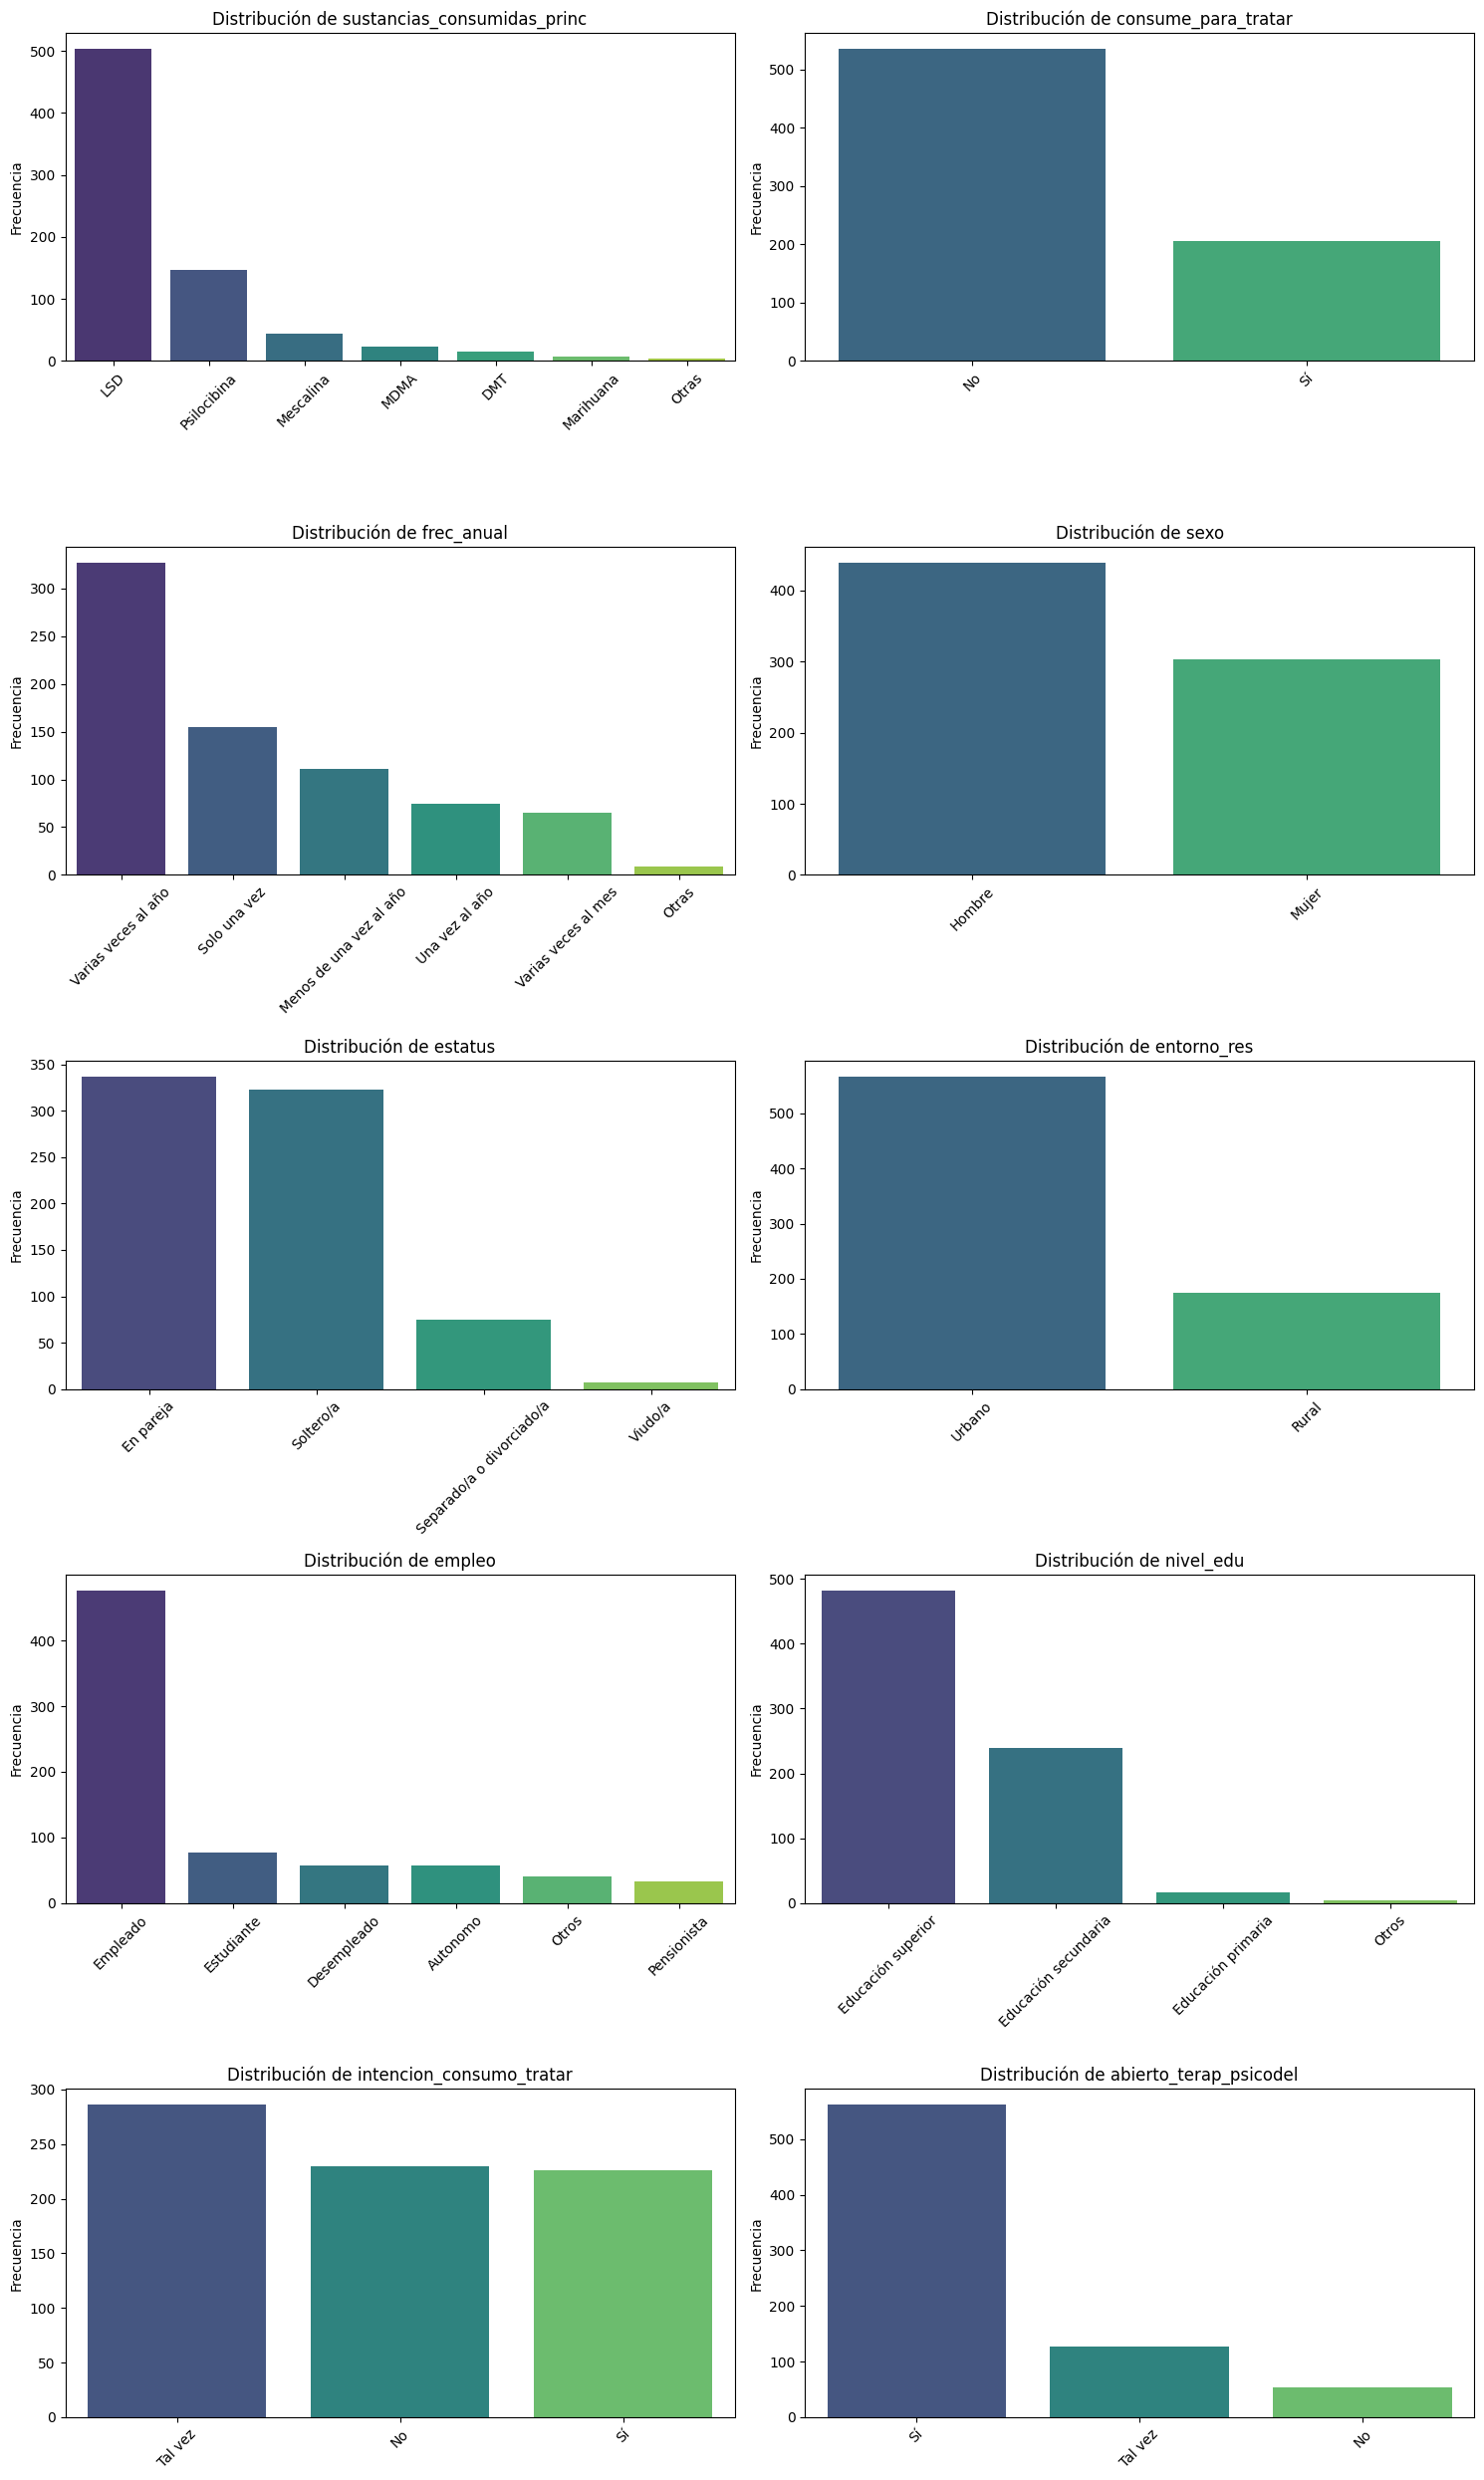

In [19]:
pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False)

#### 2.1.2 Frecuencia de variables numéricas

In [20]:
columnas_numericas = ['edad', 'ingresos', 'consumo_estimado']

In [21]:
df.describe()

,edad,ingresos,consumo_estimado
count,742.000000,742.000000,742.000000
mean,40.126685,21927.223720,28.258760
std,12.576465,19308.003909,31.991065
min,18.000000,5000.000000,1.000000
25%,30.000000,15000.000000,5.000000
50%,40.000000,15000.000000,15.000000
75%,48.000000,25000.000000,35.000000
max,75.000000,100000.000000,100.000000


### Perfil de ingresos

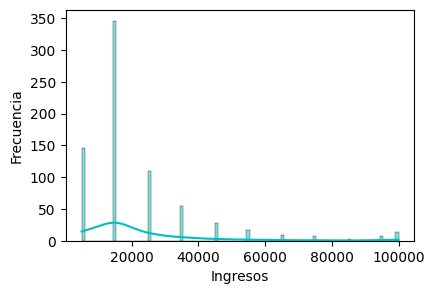

In [22]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df['ingresos']/1,
             kde=True, #Tipo
             color='c',
             bins=100, ax = axs)
axs.set_xlabel('Ingresos')
axs.set_ylabel('Frecuencia');

### Perfil de edad

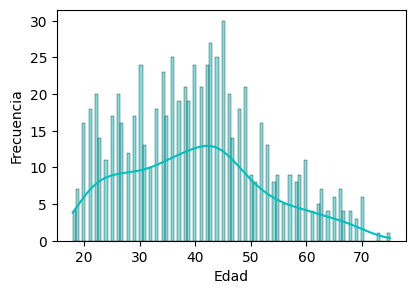

In [23]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df['edad']/1,
             kde=True, #Tipo
             color='c',
             bins=100, ax = axs)
axs.set_xlabel('Edad')
axs.set_ylabel('Frecuencia');

### Perfil de consumo estimado

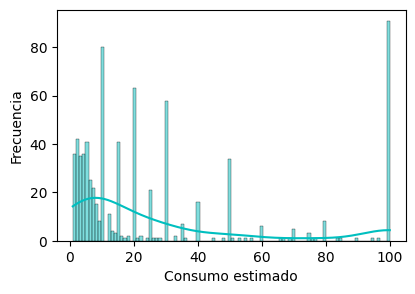

In [24]:
fig,axs = plt.subplots(1,1,figsize= (4.5,3))
sns.histplot(df['consumo_estimado']/1,
             kde=True, #Tipo
             color='c',
             bins=100, ax = axs)
axs.set_xlabel('Consumo estimado')
axs.set_ylabel('Frecuencia');

---

### 2.2 Análisis bivariante Numérica-categórica

#### 2.2.1 Cantidad vs Frecuencia de consumo
**Sí hay correlación**\
Las personas que más cantidad consumen también son las que consumen con mayor frecuencia

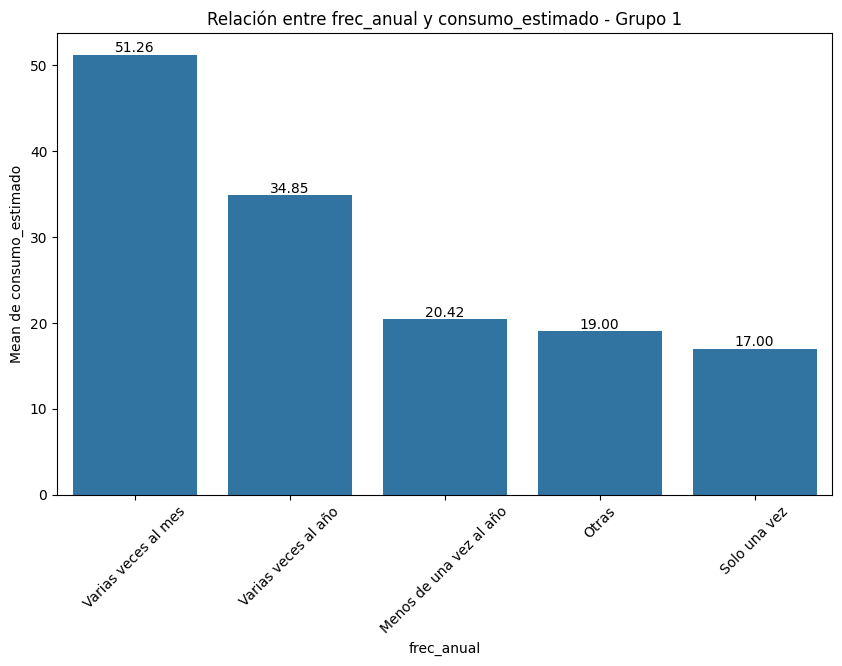

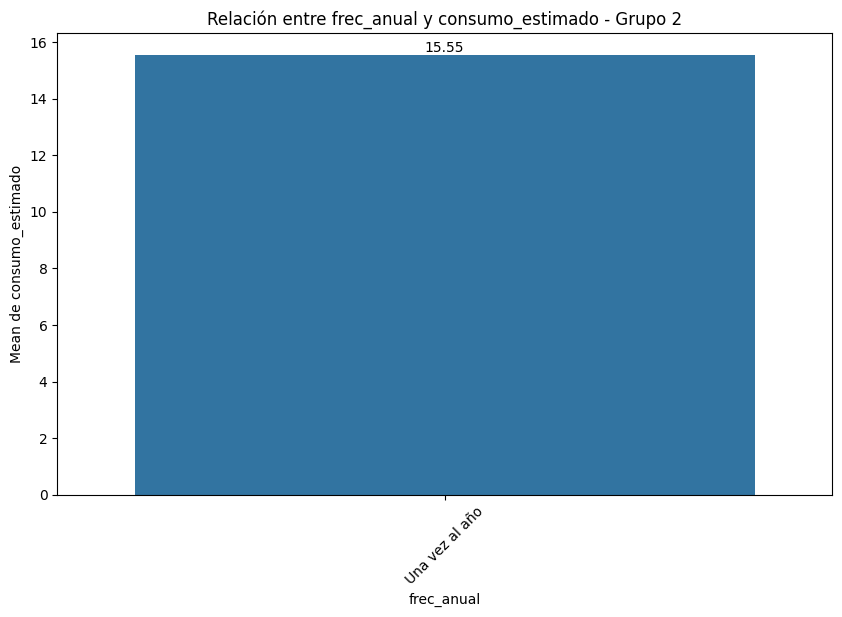

In [25]:
plot_categorical_numerical_relationship(df, 'frec_anual', 'consumo_estimado', show_values=True)

In [26]:
# Correlación Cantidad vs Frecuencia de consumo

grupos = df['frec_anual'].unique()
resultado = [df[df['frec_anual'] == grupo]['consumo_estimado'] for grupo in grupos]

#Aplicar Anova
f_val, p_val = stats.f_oneway(*resultado)

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 19.31517327540596
Valor p: 4.290078297821212e-18


#### 2.2.2 Cantidad vs Consume para tratarse
**Sí hay correlación**\
Las personas que consumen psicotrópicos para tratarse lo hacen con un 6.5% más de cantidad

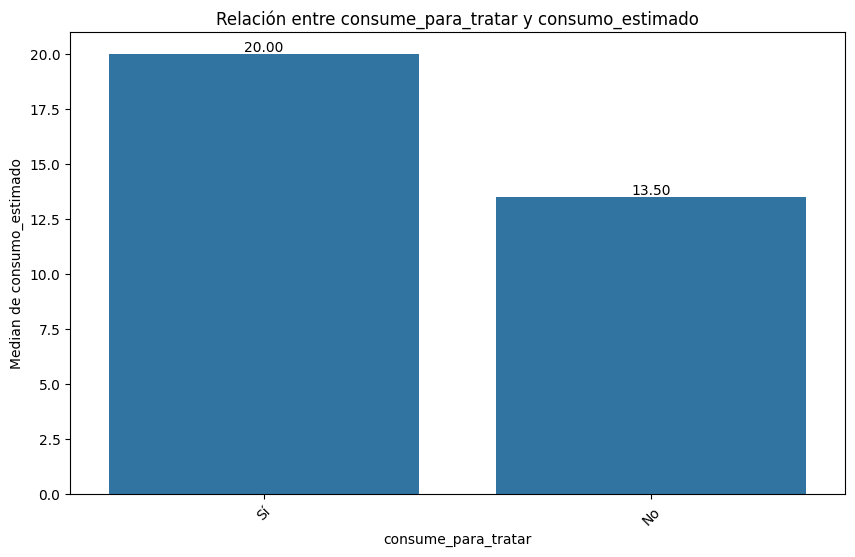

In [27]:
plot_categorical_numerical_relationship(df, 'consume_para_tratar', 'consumo_estimado', show_values=True, measure='median')

In [28]:
# Correlación Cantidad vs Consume para tratarse

grupo_a = df.loc[df.consume_para_tratar == 'Sí']['consumo_estimado']
grupo_b = df.loc[df.consume_para_tratar == 'No']['consumo_estimado']
 
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

#Aplicar Prueba U
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 61320.0
Valor p: 0.019102239125351562


#### 2.2.3 Cantidad vs Sexo
**Sí hay correlación**\
Los hombres consumen un 10% más de media

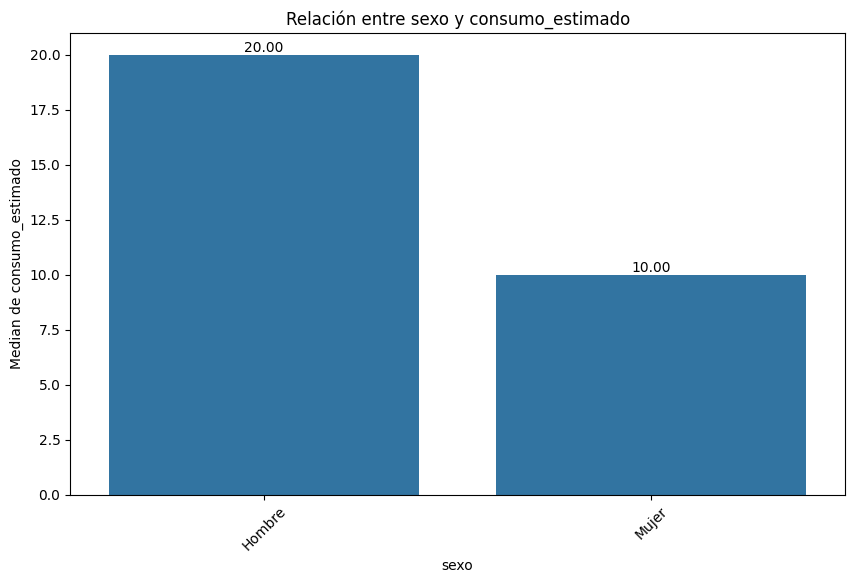

In [29]:
plot_categorical_numerical_relationship(df, 'sexo', 'consumo_estimado', show_values=True, measure='median')

In [30]:
# Correlación Cantidad vs sexo

grupo_a = df.loc[df.sexo == 'Hombre']['consumo_estimado']
grupo_b = df.loc[df.sexo == 'Mujer']['consumo_estimado']
 
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

#Aplicar Prueba U
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 78815.0
Valor p: 1.7130593788264496e-05


#### 2.2.4 Cantidad vs Entorno
**Sí hay correlación**\
Personas de entorno rural consumen 15% más en cantidad

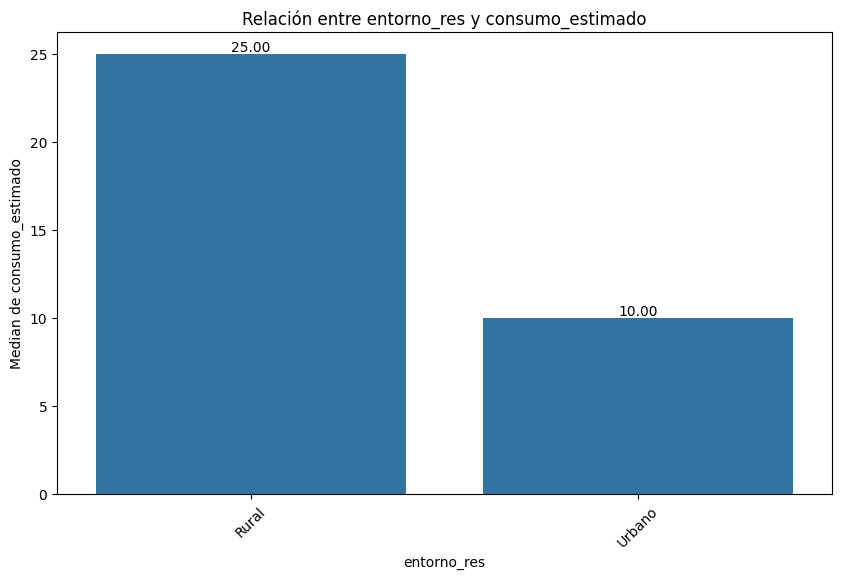

In [31]:
plot_categorical_numerical_relationship(df, 'entorno_res', 'consumo_estimado', show_values=True, measure='median')

In [32]:
# Correlación Cantidad vs entorno
grupo_a = df.loc[df.entorno_res == 'Rural']['consumo_estimado']
grupo_b = df.loc[df.entorno_res == 'Urbano']['consumo_estimado']
 
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

#Aplicar Prueba U
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 64126.0
Valor p: 4.341212945003342e-09


#### 2.2.5 Edad vs Consume para tratamiento
**Sí hay correlación**\
Las personas que consumen para tratamiento son más jóvenes (36 años de mediana vs 44 años) que las que no lo hacen

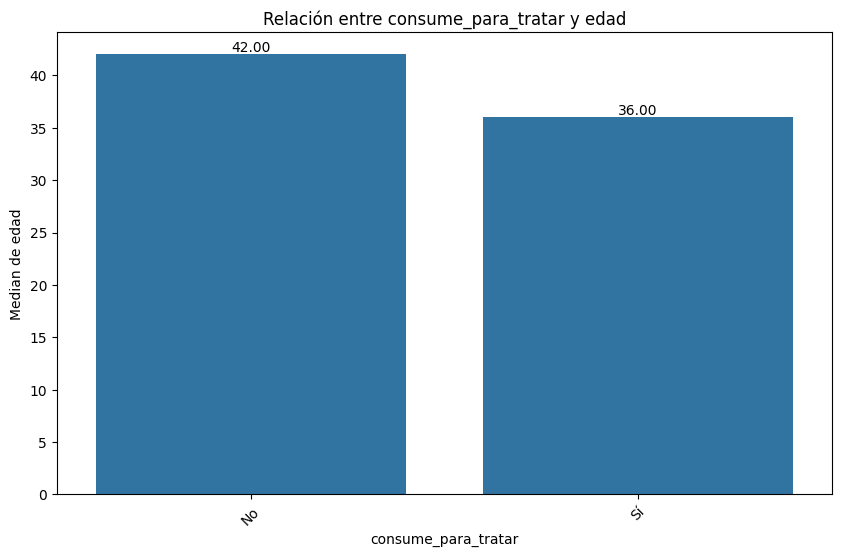

In [33]:
plot_categorical_numerical_relationship(df, 'consume_para_tratar', 'edad', show_values=True, measure='median')

In [34]:
# Correlación Edad vs consume para tratamiento

grupo_a = df.loc[df.consume_para_tratar == 'Sí']['consumo_estimado']
grupo_b = df.loc[df.consume_para_tratar == 'No']['consumo_estimado']
 
u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

#Aplicar Prueba U
print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 61320.0
Valor p: 0.019102239125351562


#### 2.2.6 Cantidad vs Sustancias consumidas
**No hay correlación**\
Marihuana, seguida de LSD es la sustancia con mayor cantidad de consumo

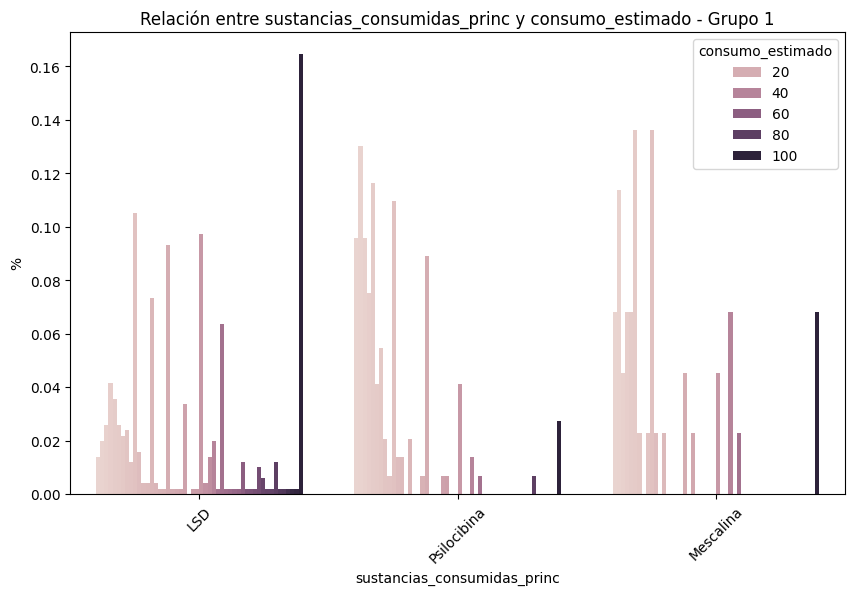

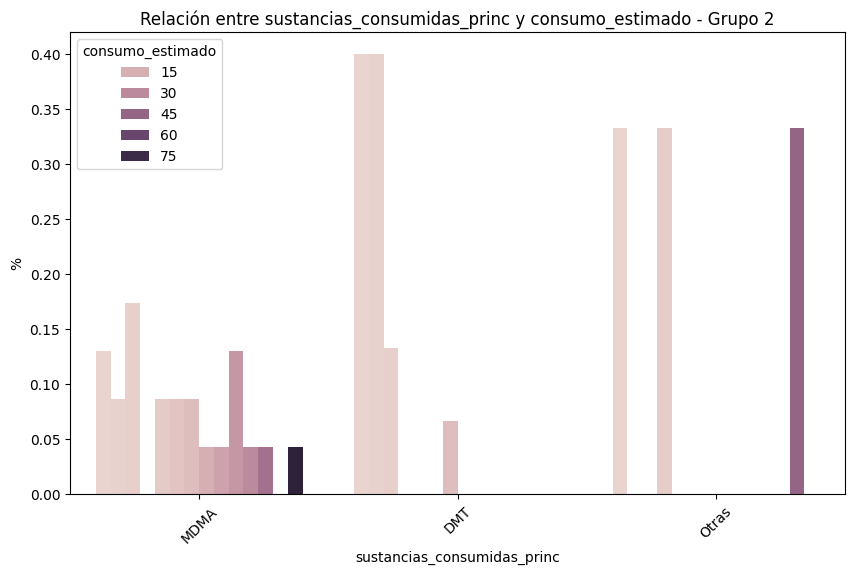

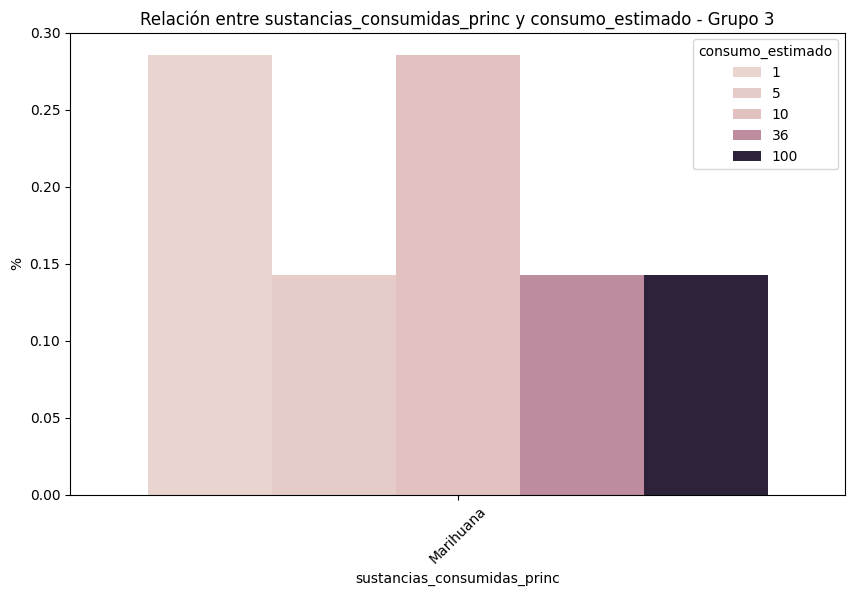

In [35]:
plot_categorical_relationship_fin(df, 'sustancias_consumidas_princ', 'consumo_estimado', relative_freq=True, show_values=False, size_group = 3)

In [36]:
# Correlación Ingresos vs sustancias consumidas

grupos = df['sustancias_consumidas_princ'].unique()

resultado = [df[df['sustancias_consumidas_princ'] == grupo]['consumo_estimado'] for grupo in grupos]

#Aplicar Anova
f_val, p_val = stats.f_oneway(*resultado)

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.759662889750894
Valor p: 4.461274299431625e-17


#### 2.2.7 Ingresos vs Sustancias consumidas
**No hay correlación**\
LSD es la sustancia más popular en casi todos los niveles de ingresos

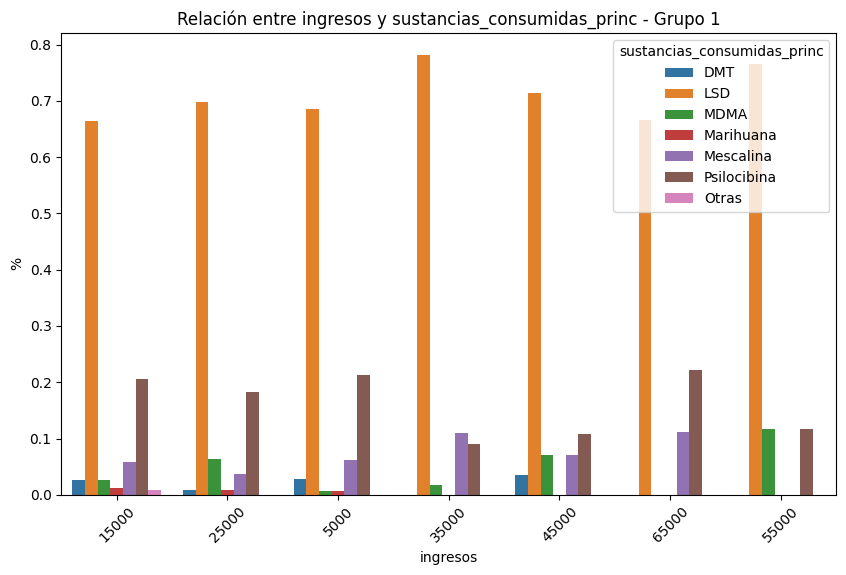

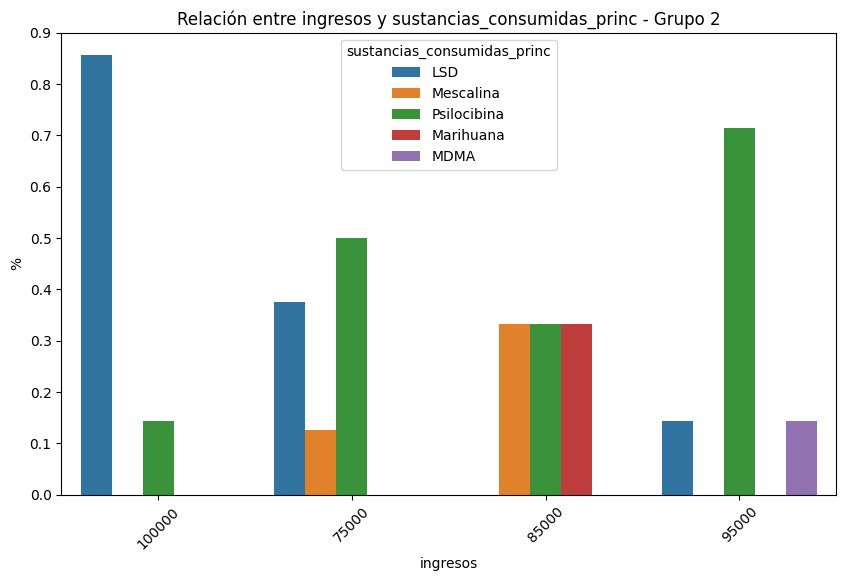

In [37]:
plot_categorical_relationship_fin(df, 'ingresos', 'sustancias_consumidas_princ', relative_freq=True, show_values=False, size_group = 7)

In [38]:
# Correlación Ingresos vs sustancias consumidas

grupos = df['sustancias_consumidas_princ'].unique()

resultado = [df[df['sustancias_consumidas_princ'] == grupo]['ingresos'] for grupo in grupos]

#Aplicar Anova
f_val, p_val = stats.f_oneway(*resultado)

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 0.8764563987588796
Valor p: 0.5116412080593893


#### 2.2.8 Frecuencia de consumo vs ingresos
**No hay correlación**

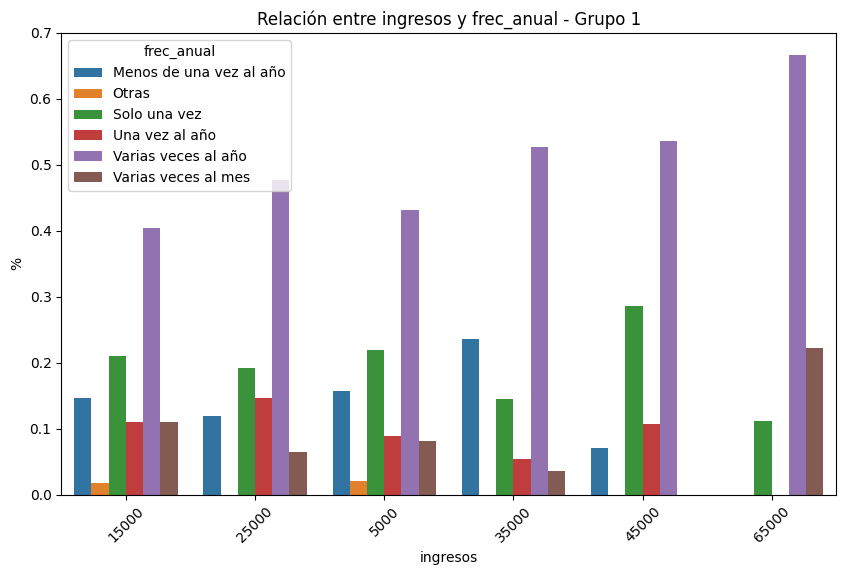

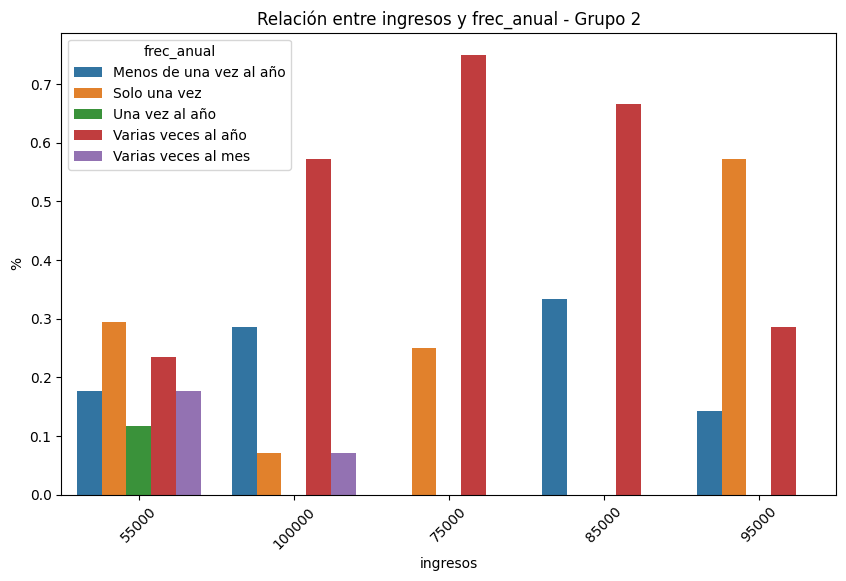

In [39]:
plot_categorical_relationship_fin(df, 'ingresos', 'frec_anual', relative_freq=True, show_values=False, size_group = 6)

In [40]:
# Correlación frecuencia de consumo vs Ingresos

grupos = df['frec_anual'].unique()

resultado = [df[df['frec_anual'] == grupo]['ingresos'] for grupo in grupos]

#Aplicar Anova
f_val, p_val = stats.f_oneway(*resultado)

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1.5525593312198291
Valor p: 0.17128696495397552


#### 2.2.9 Frecuencia de consumo vs edad
**Sí hay correlación**

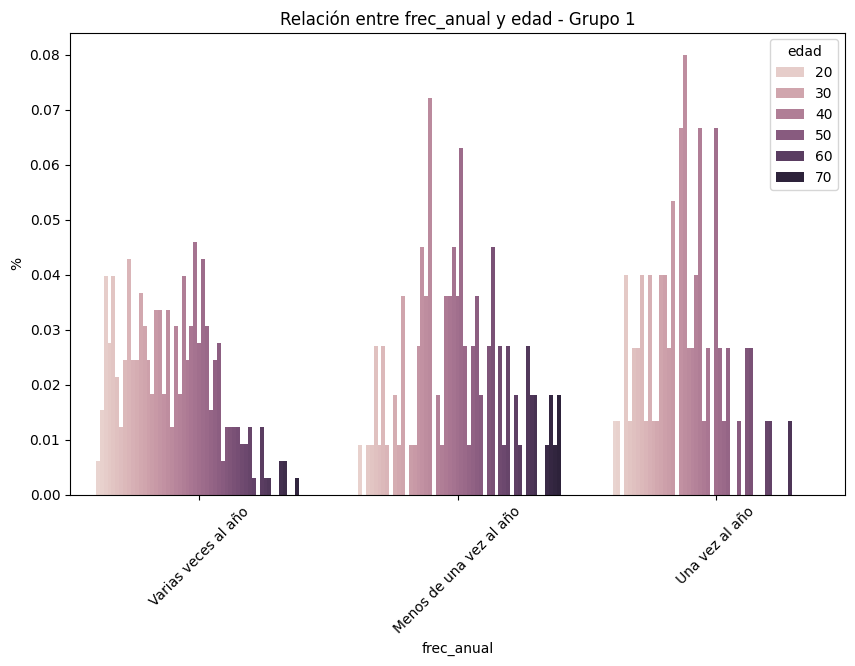

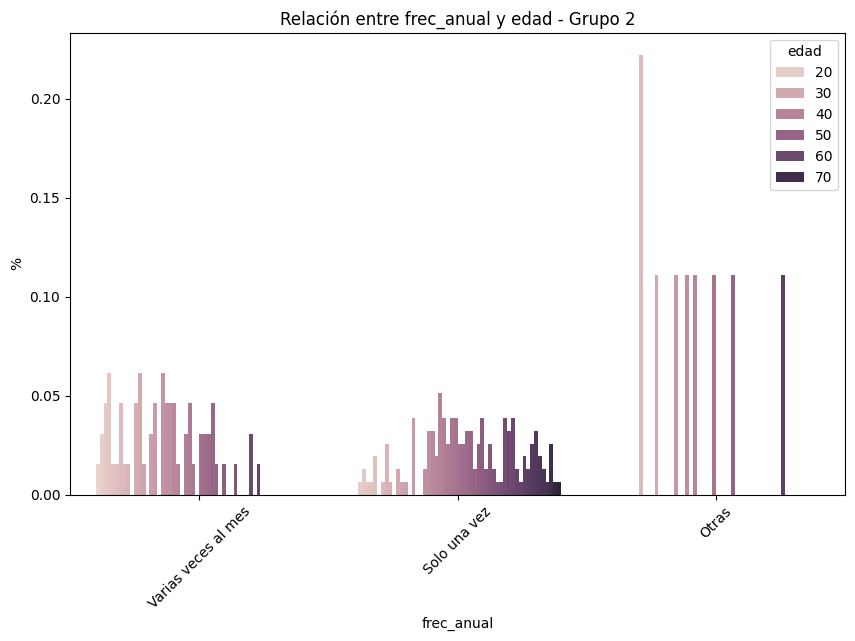

In [41]:
plot_categorical_relationship_fin(df, 'frec_anual', 'edad', relative_freq=True, show_values=False, size_group = 3)

In [42]:
# Correlación frecuencia de consumo vs Edad

grupos = df['frec_anual'].unique()

resultado = [df[df['frec_anual'] == grupo]['edad'] for grupo in grupos]

#Aplicar Anova
f_val, p_val = stats.f_oneway(*resultado)

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 26.298245659518287
Valor p: 1.7282918892282947e-24


### 2.3 Análisis bivariante Numérica-Numérica

#### 2.3.1 Mapa de calor

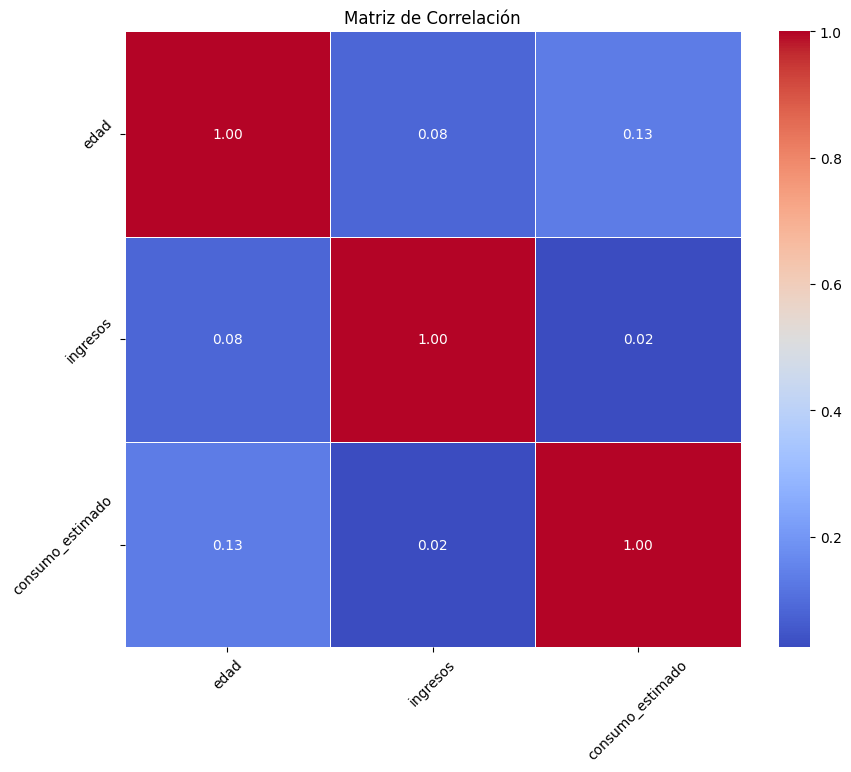

In [43]:
corr_matrix = df.corr(numeric_only= True) # Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

# Mapa de calor
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()

#### 2.3.2 Consumo estimado vs edad
**Sí hay correlación**

In [44]:
pearsonr(df["consumo_estimado"], df["edad"])

PearsonRResult(statistic=0.13167307726942973, pvalue=0.00032270781383995966)

#### 2.3.3 Consumo estimado vs ingresos
**Sí hay hay correlación**

In [45]:
pearsonr(df["ingresos"], df["edad"])

PearsonRResult(statistic=0.08182894553620962, pvalue=0.025815560979834513)

### 2.4 Análisis bivariante Categórica-Categórica

#### 2.4.1 Frecuencia de consumo vs consume para tratarse
**Sí hay correlación**\
Los que más consumen para tratamiento son también los que consumen con más frecuencia

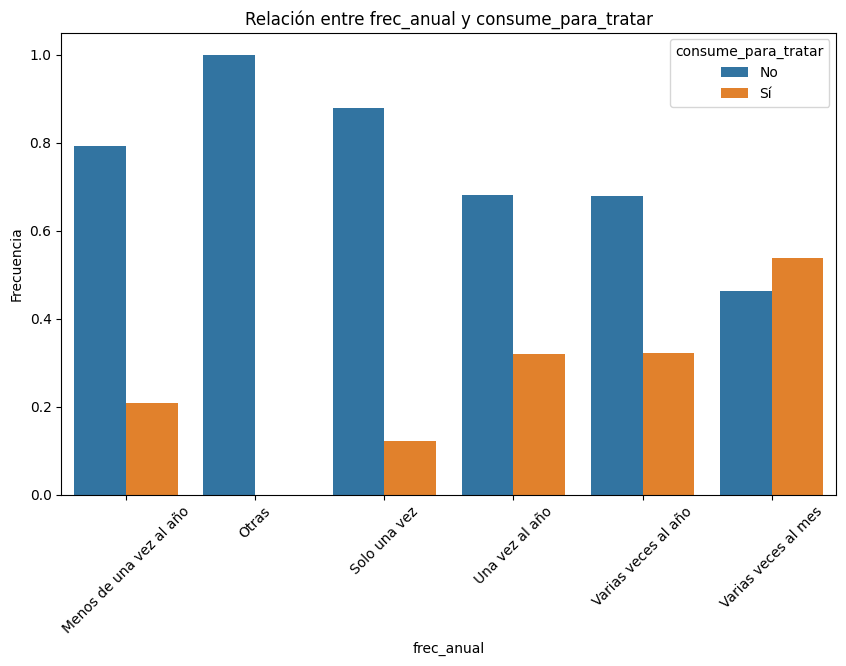

In [46]:
plot_categorical_relationship_fin(df, 'frec_anual', 'consume_para_tratar', relative_freq=True, show_values=False, size_group = 7)

In [47]:
#1: Tabla de contingencia
tabla_contingencia = pd.crosstab(df['consume_para_tratar'], df['frec_anual'])


#2: Test Chi Cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 50.58657552644175
P-Value: 1.0510624902397434e-09


#### 2.4.2 Frecuencia de consumo vs Sustancias consumidas
**Sí hay correlación**\
Psilocibina, LSD y Mescalina son las sustancias con mayor frecuencia de consumo

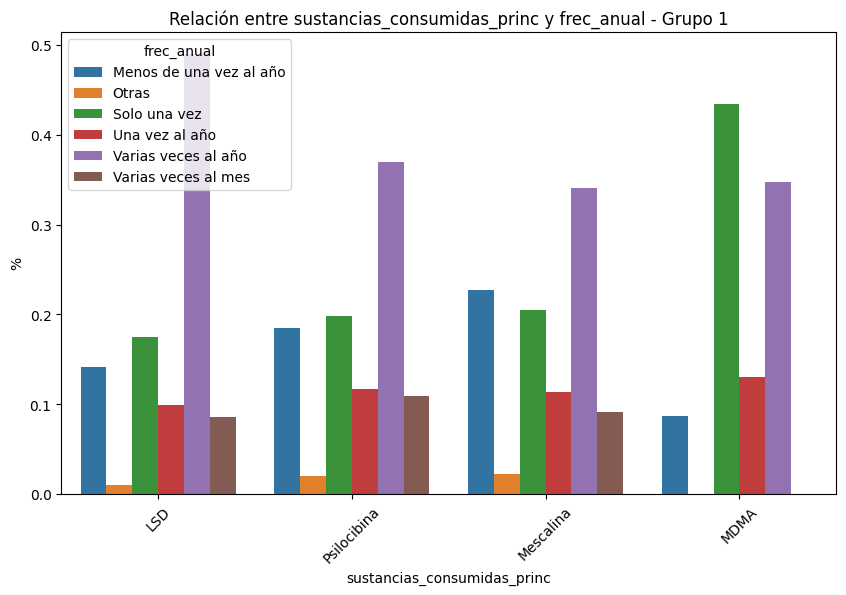

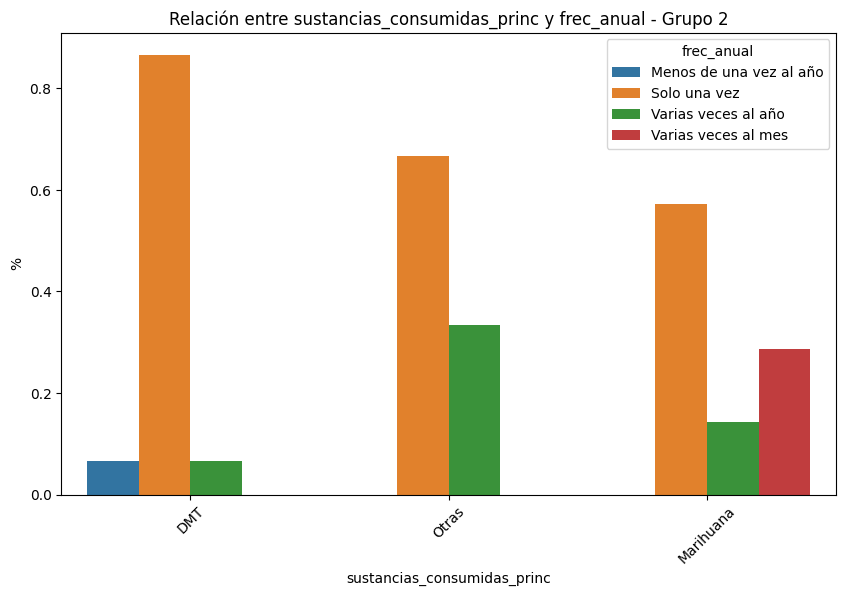

In [48]:
plot_categorical_relationship_fin(df, 'sustancias_consumidas_princ', 'frec_anual', relative_freq=True, show_values=False, size_group = 4)

In [49]:
#1: Tabla de contingencia
tabla_contingencia = pd.crosstab(df['sustancias_consumidas_princ'], df['frec_anual'])


#2: Test Chi Cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)

Valor Chi-Cuadrado: 77.9621796492612
P-Value: 3.862456905104348e-06


---

## 3. Análisis multivariante

### 3.1 Gráfico de burbujas

Se vislumbra la relación entre ingresos y cantidad de consumo, con la referencia de la edad

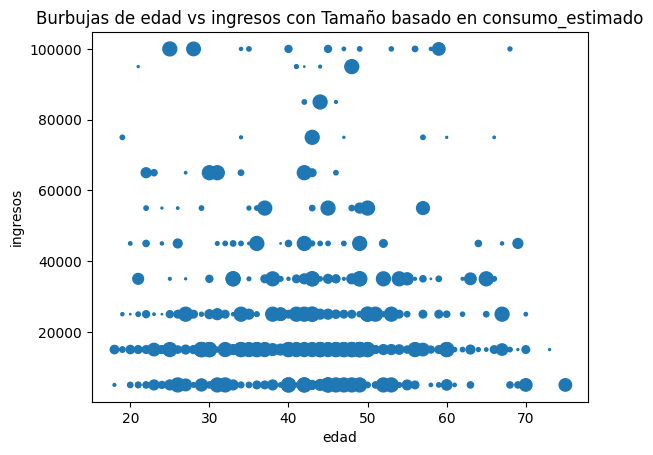

In [50]:
bubble_plot(df,"edad","ingresos","consumo_estimado", scale = 1)

### 3.2 Gráfico de dispersión

Se aprecia mejor cómo la mayoría de respuesas están en rangos de ingresos bajos y medio-bajos

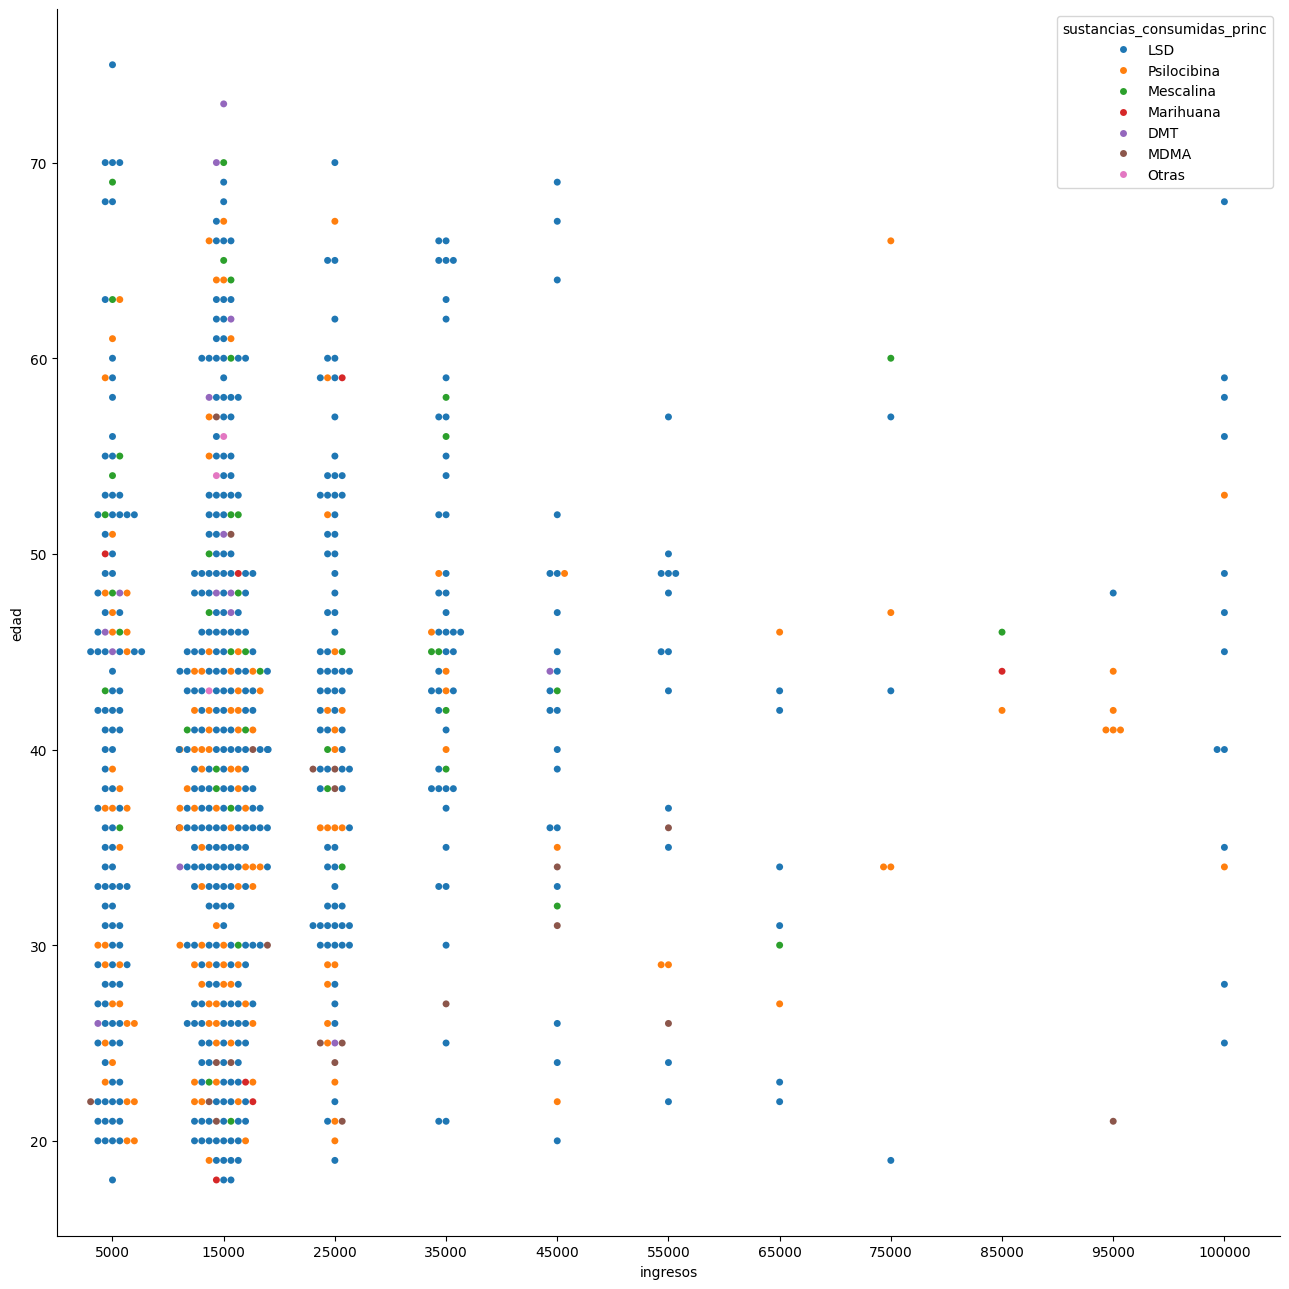

In [51]:
sns.catplot(x = "ingresos", y = "edad", hue = "sustancias_consumidas_princ", data = df, kind = "swarm", height=13, legend_out=False);

### 3.3 Gráfico de burbujas
Se aprecia perfectamente el triángulo de mayor consumo en los ingresos bajos, entre  30 y 55 años aproximadamente 

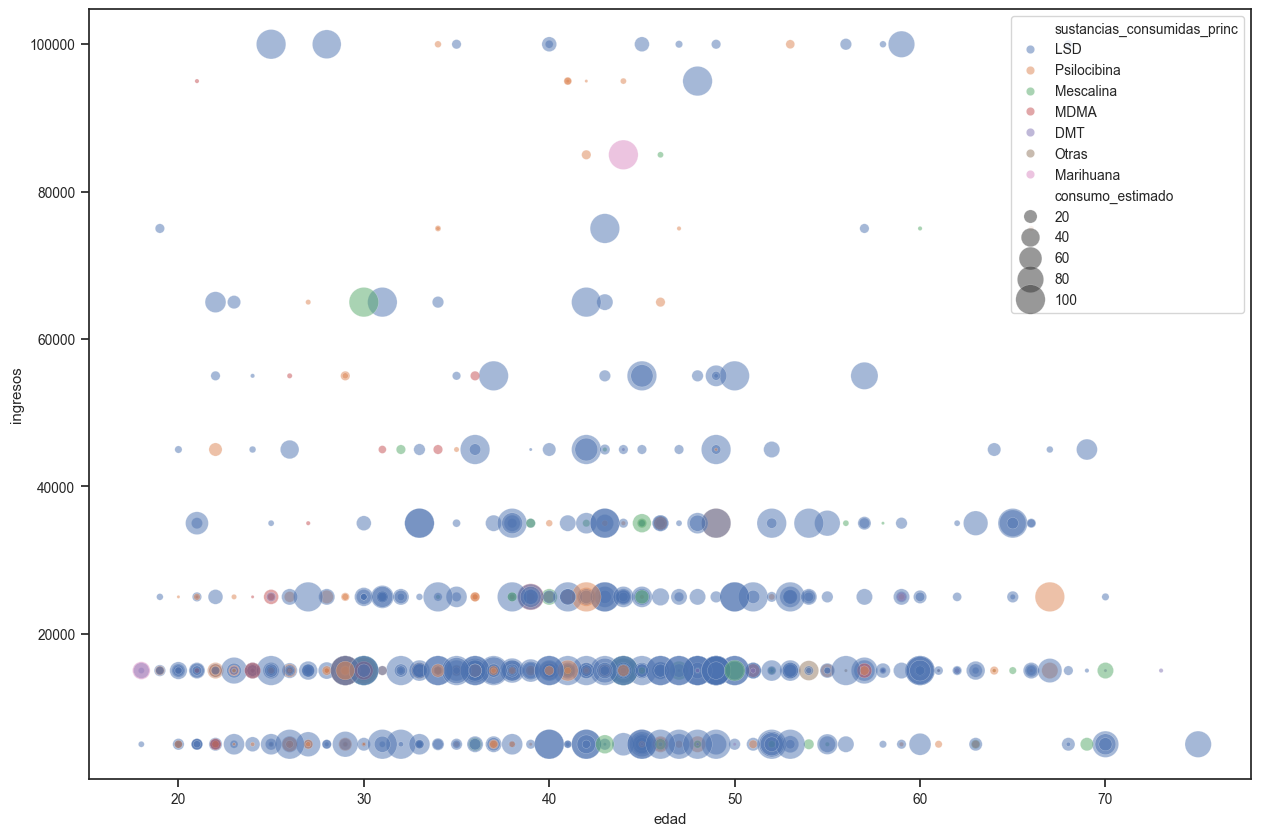

In [52]:
edad = df['edad']
ingresos = df["ingresos"]
sustancias = df["sustancias_consumidas_princ"]
consumo = df["consumo_estimado"]
kwargs = dict(alpha=0.5)

plt.figure(figsize=(15,10))
sns.set_theme(style="ticks", font_scale= 0.9)
sns.scatterplot(x=edad, y=ingresos, size=consumo, hue=sustancias, data=df, sizes=(5,450),**kwargs);